In [2]:
import sysid
import ssid
import sippy
import parid
import numpy
import control
from matplotlib import pyplot as plt
import importlib
import pandas

In [3]:
est = parid.Estimation()

In [4]:
def stretched(u, n):
    new = []
    for i in u:
        for j in range(int((numpy.random.randn(1)*n))):
            new.append(i)
    return new

A = [[0.03141991 0.12524949]
 [0.00815386 0.03250382]]

B = [[-3.79499632e-09]
 [-9.84849427e-10]]

C = [[6.75395131e-06 1.48732215e-06]]

D = [[5.]]



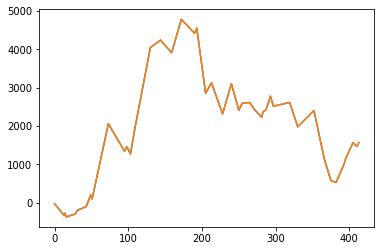

In [13]:
# test sysid

# us = [est.input['Rect'](t, 10, 50, tf) for t in ts]
# us = numpy.random.randn(t)*10
us = numpy.cumsum(stretched(numpy.random.randn(100)*10, 10))
ts = range(len(us))

_, ys, _ = control.forced_response(control.tf([5], [1]), T=ts, U=us)
plt.plot(ts, ys)

def sysid_id(y, u):
    ss1_id = sysid.subspace_det_algo1(y, u, f=2, p=2, s_tol=1e-2, dt=1)
    tf = control.ss(ss1_id.A, ss1_id.B, ss1_id.C, ss1_id.D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    print(tf)
    return ts, ys

id = sysid_id(ys, us)
plt.plot(id[0], id[1])

# this module gives questionable results
# still gives problems for estimations using any other tf than 1/1

ValueError: all the input array dimensions except for the concatenation axis must match exactly

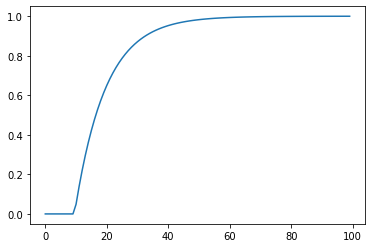

In [9]:
# try a different module
import sysid
import ssid
import sippy
import parid
import numpy
import control
from matplotlib import pyplot as plt
import importlib
est = parid.Estimation()
importlib.reload(ssid)

_, ys, _ = control.forced_response(control.tf([1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def subspace_id(y, u):
    u, y = numpy.array([u]), numpy.array([y])
    A, B, C, D, Cov, S = ssid.N4SID(u, y, 100, 100, 4)
    tf = control.ss(A, B, C, D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    plt.plot(ts, ys) 
    return tf.num, tf.den

subspace_id(ys, us)

# "TypeError: 'float' object cannot be interpreted as an integer" but I cannot see where to correct it
# the above error exists even in the example code from the N4SID github when run https://github.com/AndyLamperski/pyN4SID/blob/master/N4SIDtest.ipynb

A = [[0.9048617]]

B = [[-0.00015561]]

C = [[-614.98774942]]

D = [[0.]]



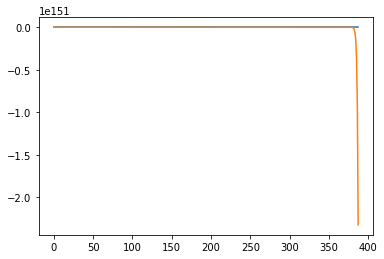

In [702]:
# try SIPPY https://github.com/CPCLAB-UNIPI/SIPPY.git (requires slycot)
us = numpy.cumsum(stretched(numpy.random.randn(100)*10, 10))
ts = range(len(us))

_, ys, _ = control.forced_response(control.tf([1,1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def sippy_id(y, u):
    u, y = numpy.array(u), numpy.array(y)
    sys_id = sippy.system_identification(y, u, 'N4SID')
    tf = control.ss(sys_id.A, sys_id.B, sys_id.C, sys_id.D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    print(tf)
    return ts, ys

id = sippy_id(ys, us)
plt.plot(id[0], id[1])

# similar problem as sysid?
# same as with sysid w.r.t. random input results

A = [[0.90488389]]

B = [[-0.00037681]]

C = [[-252.02474186]]

D = [[0.]]



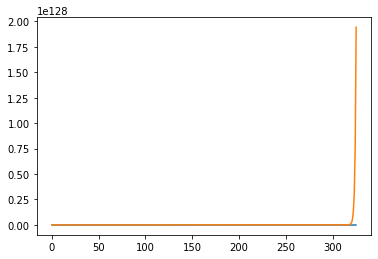

In [703]:
#  try MOESP

us = numpy.cumsum(stretched(numpy.random.randn(100)*10, 10))
ts = range(len(us))

_, ys, _ = control.forced_response(control.tf([1,1], [10,1]), T=ts, U=us)
plt.plot(ts, ys)

def sippy_id(y, u):
    u, y = numpy.array(u), numpy.array(y)
    sys_id = sippy.system_identification(y, u, 'MOESP')
    tf = control.ss(sys_id.A, sys_id.B, sys_id.C, sys_id.D)
    _, ys, _ = control.forced_response(tf, T=ts, U=us)
    print(tf)
    return ts, ys

id = sippy_id(ys, us)
plt.plot(id[0], id[1])

# still no luck

A = [[0.90484283]]

B = [[-0.00025528]]

C = [[-373.96471655]]

D = [[0.]]

A = [[0.90483742]]

B = [[0.08150325]]

C = [[1.]]

D = [[0.14353676]]



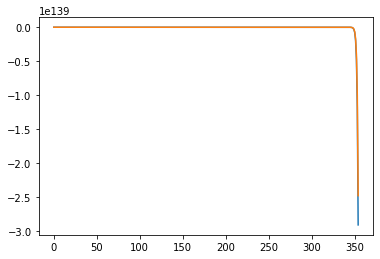

In [701]:
sipid = sippy_id(ys, us)
syid = sysid_id(ys, us)
t = sipid[0]

plt.plot(t, sipid[1])
plt.plot(t, syid[1])

In [16]:
# results format:
import matplotlib.pyplot as plt
df0 = pandas.DataFrame({'key': ['Duration', 'Num', 'Den', 'Numr', 'Denr', 'Data']})
# df3 = pandas.read_csv('test.csv')
# df3 = df3.set_index('Time')
df1 = pandas.DataFrame({'id1': [1, [4], [1,2], [6], [2,4]]})#, df3]})
df2 = pandas.DataFrame({'id2': [1, [4], [1,2], [6], [2,4], df1]})

df = pandas.concat([df0, df1, df2], axis=1)
df = df.set_index('key')
# plt.plot(df['id1']['Data']['Y Estimate'])

df.to_csv('restest.csv')
df = pandas.read_csv('restest.csv')
df = df.set_index('key')
# plt.plot(df['id1']['Data']['Y Estimate'])
df

,id1,id2
key,,
Duration,1,1
Num,[4],[4]
Den,"[1, 2]","[1, 2]"
Numr,[6],[6]
Denr,"[2, 4]","[2, 4]"
Data,NaN,"id1\n0 1\n1 [4]\n2 [1, 2]\n3 ..."


In [20]:
import json
import numpy

run = {
     "Technique": "Diferential Evolution",
     "Input": "Step",
     "Noise": "None",
     "Duration": 600,
     "Num": [1],
     "Den": [1,0,1],
     "Num Est": [1],
     "Den Est": [1,0,1],
     "Time": [60],
     "Y": [1],
     "U": [1],
     "Y Est": [1],
     "History": [1]
}

with open('run.json', 'w') as f:
    json.dump(run, f)
    
with open('run.json', 'r') as f:
     run_read = json.load(f)
        
numpy.array(run_read['Den']) - run_read['Den'][0]

array([ 0, -1,  0])